In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a simulated healthcare dataset with missing, inconsistent, and noisy data
data = {
    'patient_id': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'age': [45, 50, 30, 40, 35, np.nan, 55, 65, 25],
    'gender': ['M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F'],
    'blood_pressure': [120, np.nan, 130, 125, 110, 140, 135, 140, 115],
    'weight': [80, 75, np.nan, 60, 55, 90, 70, 85, 58],
    'disease': [1, 0, 1, 0, 1, 1, 0, 1, 0]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Display the original dataset
print("Original Dataset with Missing Values:")
print(df)



Original Dataset with Missing Values:
   patient_id   age gender  blood_pressure  weight  disease
0           1  45.0      M           120.0    80.0        1
1           2  50.0      F             NaN    75.0        0
2           3  30.0      M           130.0     NaN        1
3           4  40.0      F           125.0    60.0        0
4           5  35.0      F           110.0    55.0        1
5           6   NaN      M           140.0    90.0        1
6           7  55.0      F           135.0    70.0        0
7           8  65.0      M           140.0    85.0        1
8           9  25.0      F           115.0    58.0        0


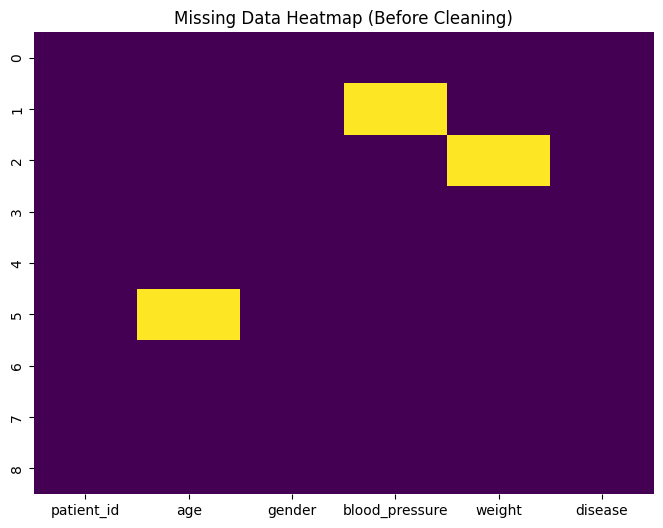

In [13]:
# Visualizing missing data before cleaning
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap (Before Cleaning)")
plt.show()



In [14]:
# Handle Missing Data
numerical_cols = ['age', 'blood_pressure', 'weight']
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Impute missing categorical values ('gender') using the mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

# Visualize the data after handling missing values
print("\nData after handling missing values:")
print(df)



Data after handling missing values:
   patient_id   age gender  blood_pressure  weight  disease
0           1  45.0      M           120.0    80.0        1
1           2  50.0      F           127.5    75.0        0
2           3  30.0      M           130.0    72.5        1
3           4  40.0      F           125.0    60.0        0
4           5  35.0      F           110.0    55.0        1
5           6  42.5      M           140.0    90.0        1
6           7  55.0      F           135.0    70.0        0
7           8  65.0      M           140.0    85.0        1
8           9  25.0      F           115.0    58.0        0


<ipython-input-14-491f104d0917>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mode()[0], inplace=True)


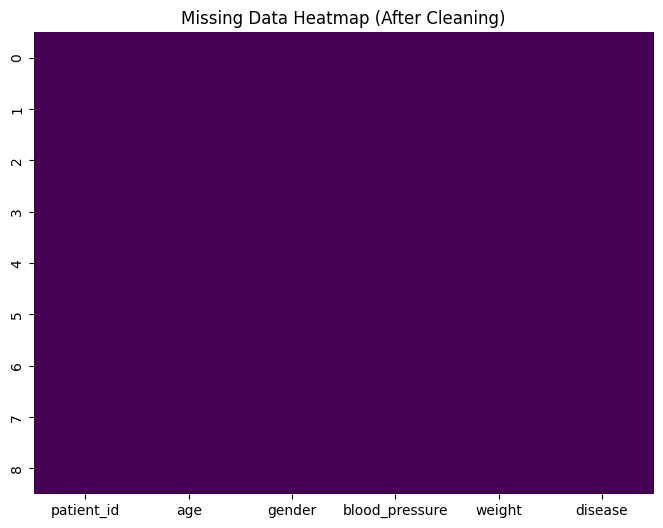

In [15]:
# Visualizing missing data after cleaning
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap (After Cleaning)")
plt.show()


In [16]:
# Standardize 'gender' column to upper case
df['gender'] = df['gender'].str.upper()

# Handle inconsistent blood pressure (values should be between 0 and 200)
df['blood_pressure'] = np.where((df['blood_pressure'] < 0) | (df['blood_pressure'] > 200), np.nan, df['blood_pressure'])
df['blood_pressure'].fillna(df['blood_pressure'].median(), inplace=True)

# Display data after handling inconsistent values
print("\nData after handling inconsistent data:")
print(df)



Data after handling inconsistent data:
   patient_id   age gender  blood_pressure  weight  disease
0           1  45.0      M           120.0    80.0        1
1           2  50.0      F           127.5    75.0        0
2           3  30.0      M           130.0    72.5        1
3           4  40.0      F           125.0    60.0        0
4           5  35.0      F           110.0    55.0        1
5           6  42.5      M           140.0    90.0        1
6           7  55.0      F           135.0    70.0        0
7           8  65.0      M           140.0    85.0        1
8           9  25.0      F           115.0    58.0        0


<ipython-input-16-d940ea1ebc48>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['blood_pressure'].fillna(df['blood_pressure'].median(), inplace=True)


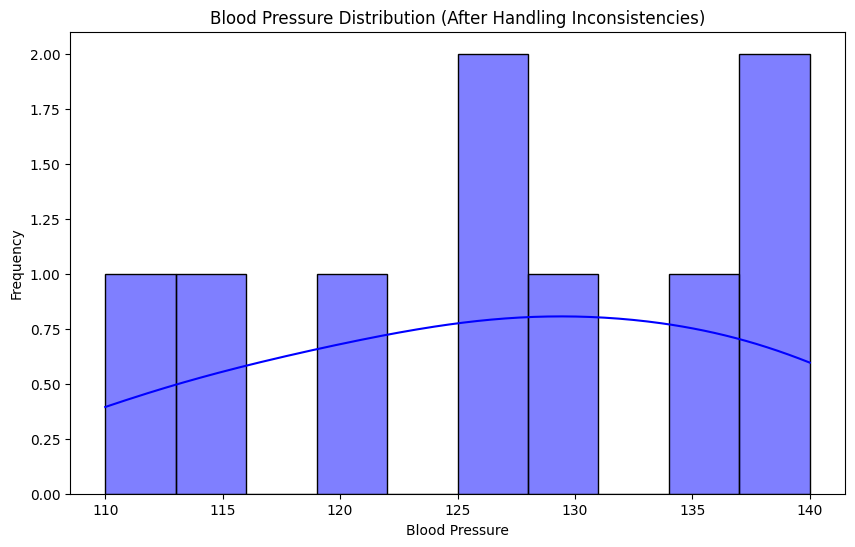

In [17]:
# Visualizing the distribution of blood pressure before and after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df['blood_pressure'], kde=True, color='blue', bins=10)
plt.title('Blood Pressure Distribution (After Handling Inconsistencies)')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()



In [19]:
# Remove outliers from blood pressure and weight using percentile-based filtering
for col in ['blood_pressure', 'weight']:
    lower_percentile = df[col].quantile(0.01)
    upper_percentile = df[col].quantile(0.99)
    df = df[(df[col] >= lower_percentile) & (df[col] <= upper_percentile)]

# Display data after handling noisy data (outliers)
print("\nData after handling noisy data (outliers):")
print(df)



Data after handling noisy data (outliers):
   patient_id   age gender  blood_pressure  weight  disease
2           3  30.0      M           130.0    72.5        1
6           7  55.0      F           135.0    70.0        0


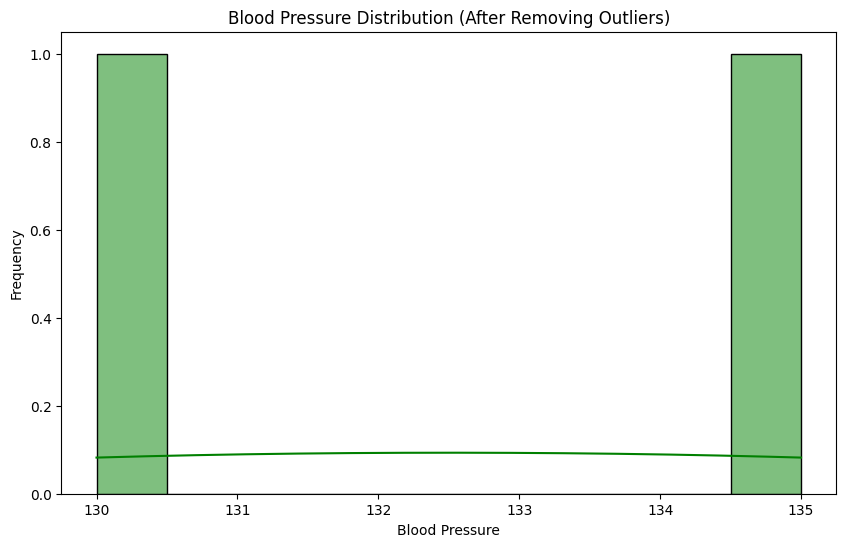

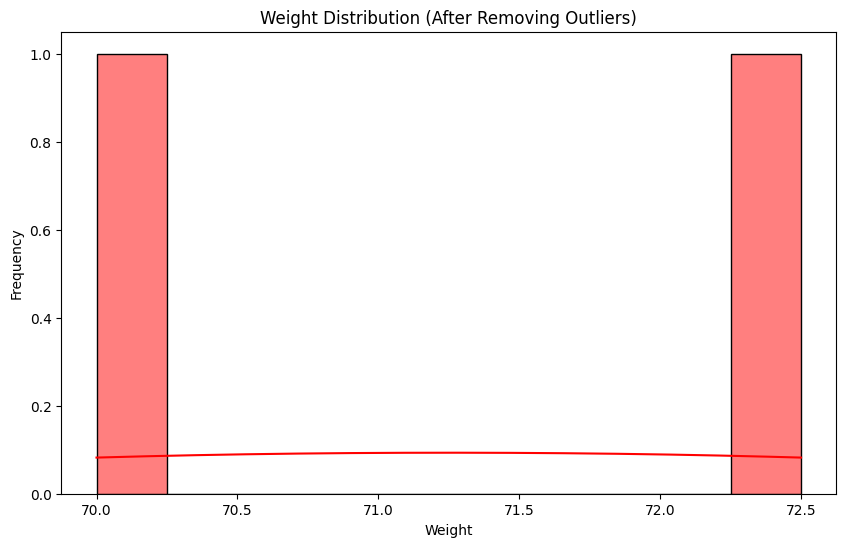

In [20]:
# Visualizing the distribution of blood pressure after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['blood_pressure'], kde=True, color='green', bins=10)
plt.title('Blood Pressure Distribution (After Removing Outliers)')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of weight after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], kde=True, color='red', bins=10)
plt.title('Weight Distribution (After Removing Outliers)')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()



In [21]:
# Label Encoding 'gender' column: M = 0, F = 1
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

# Feature Scaling (Standardization)
scaler = StandardScaler()
df[['age', 'blood_pressure', 'weight']] = scaler.fit_transform(df[['age', 'blood_pressure', 'weight']])

# Display the cleaned and preprocessed data
print("\nData after feature engineering and encoding:")
print(df)




Data after feature engineering and encoding:
   patient_id  age  gender  blood_pressure  weight  disease
2           3 -1.0       1            -1.0     1.0        1
6           7  1.0       0             1.0    -1.0        0


In [27]:
# Split the data into features (X) and target (y)
X = df[['age', 'gender', 'blood_pressure', 'weight']]  # Features
y = df['disease']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [24]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [25]:
# Display model evaluation metrics
print("\nModel Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))



Model Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Accuracy Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

# New Section